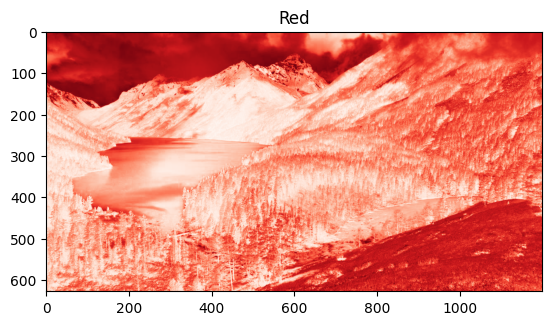

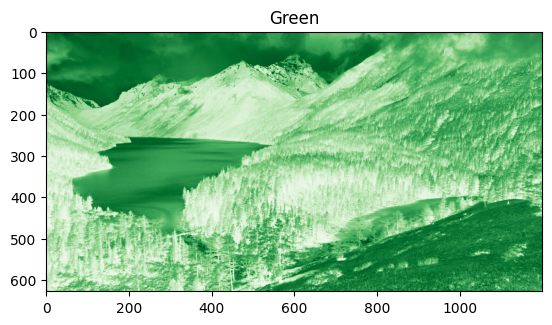

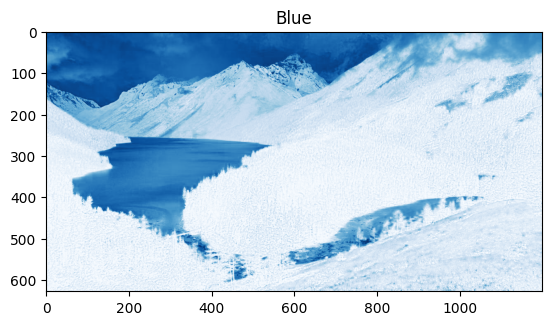

: 

In [ ]:
# bài 1
from PIL import Image
import numpy as np
import imageio.v2 as iio
from PIL import Image
import matplotlib.pyplot as plt

data = iio.imread('scence.png')


rdata = data[:, :, 0]
plt.imshow(rdata, cmap='Reds')  
plt.title("Red")
plt.show()


gdata = data[:, :, 1]
plt.imshow(gdata, cmap='Greens')
plt.title("Green")
plt.show()


bdata = data[:, :, 2]
plt.imshow(bdata, cmap='Blues')
plt.title("Blue")
plt.show()


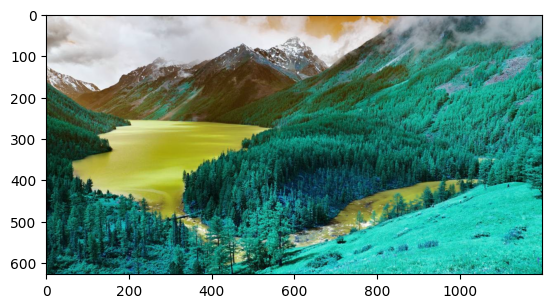

In [12]:
#bài 2
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('scence.png')  


rgb_to_grb = img[:, :, [1, 0, 2]]  
rgb_to_bgr = img[:, :, [2, 1, 0]]  
rgb_to_brg = img[:, :, [2, 0, 1]]  

# Lưu các ảnh sau khi hoán đổi
iio.imsave('scence_grb.png', rgb_to_grb)
iio.imsave('scence_bgr.png', rgb_to_bgr)
iio.imsave('scence_brg.png', rgb_to_brg)

# Hiển thị thử 1 ảnh
plt.imshow(rgb_to_bgr)
plt.show()


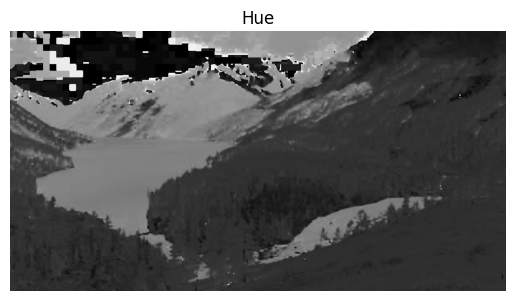

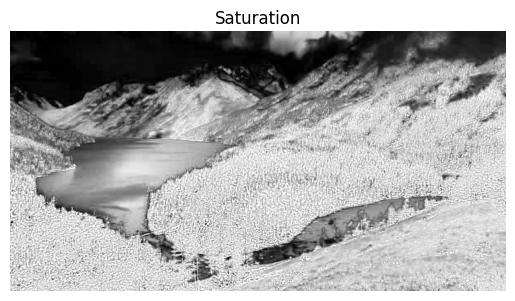

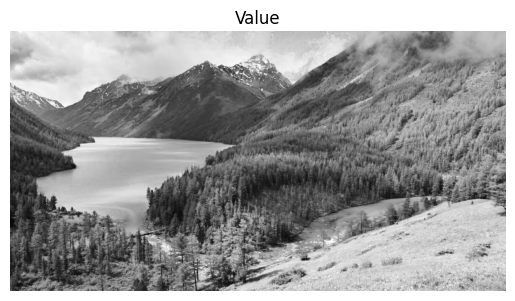

In [ ]:
#bài 3
import imageio.v2 as iio
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

img = iio.imread('scence.png') / 255.0  
if img.shape[-1] == 4: 
    img = img[..., :3]

hsv = mcolors.rgb_to_hsv(img)

H = hsv[..., 0]
S = hsv[..., 1]
V = hsv[..., 2]


iio.imwrite('hue.png', (H * 255).astype(np.uint8))
iio.imwrite('saturation.png', (S * 255).astype(np.uint8))
iio.imwrite('value.png', (V * 255).astype(np.uint8))


for channel, name in zip([H, S, V], ['Hue', 'Saturation', 'Value']):
    plt.imshow(channel, cmap='gray')
    plt.title(name)
    plt.show()


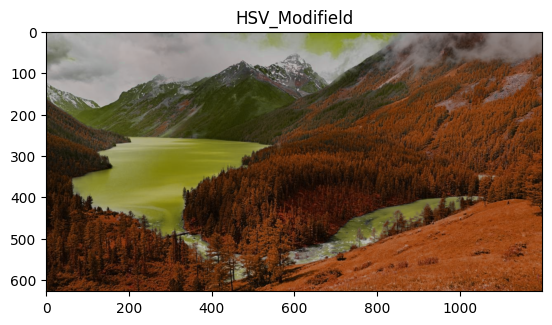

In [ ]:
# Bài 4
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys
from PIL import Image


rgb = iio.imread('scence.png').astype(np.float32) / 255.0


rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])


h = (1/3) * h
v = (3/4) * v


h = np.clip(h, 0, 1)
v = np.clip(v, 0, 1)


hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r, g, b = hsv2rgb(h, s, v)


rgb_new = np.stack([r, g, b], axis=2)
rgb_new_uint8 = (rgb_new * 255).astype(np.uint8)


img_out = Image.fromarray(rgb_new_uint8)
img_out.save('hsv_modified.png')


plt.imshow(rgb_new)
plt.title("HSV_Modifield")
plt.show()


[[181 177 175 ... 163 149 134]
 [181 177 176 ... 158 146 136]
 [174 174 173 ... 161 155 146]
 ...
 [174 170 168 ... 139 135 125]
 [176 170 166 ... 137 134 125]
 [168 164 165 ... 142 137 129]]


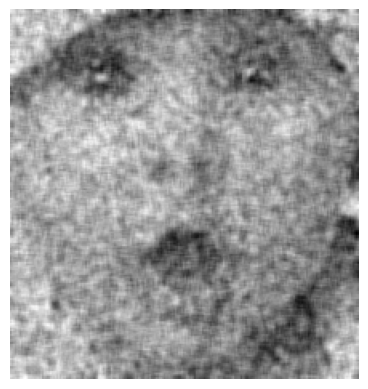

[[155 167 154 ... 184 191 193]
 [157 165 155 ... 183 190 192]
 [156 163 148 ... 190 200 201]
 ...
 [ 60  73  58 ...  84  77  74]
 [ 47  60  52 ...  77  64  62]
 [ 62  68  53 ...  73  63  58]]


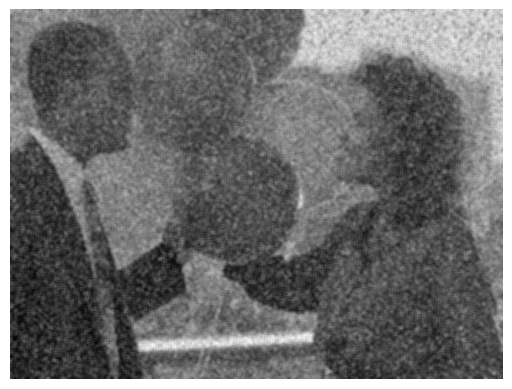

[[42 40 46 ... 70 71 69]
 [40 39 45 ... 69 70 67]
 [40 40 45 ... 69 70 69]
 ...
 [51 47 47 ... 53 43 37]
 [58 53 53 ... 41 35 33]
 [63 58 57 ... 34 31 31]]


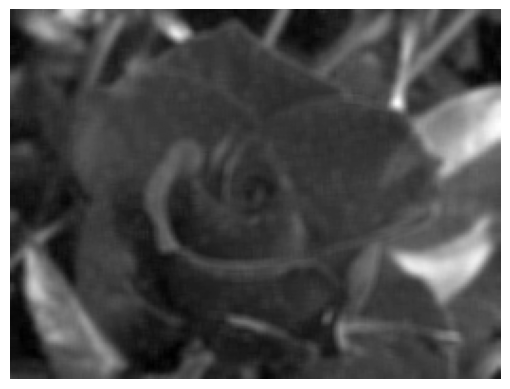

In [ ]:
# Bài 5
import numpy as np
import imageio.v2 as iio
from scipy import ndimage as sn
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


a_rgb = iio.imread('baby.jpeg')
x_rgb = iio.imread('balloons_noisy.png')
z_rgb = iio.imread('flower.jpeg')


a = (rgb2gray(a_rgb) * 255).astype(np.uint8)
x = (rgb2gray(x_rgb) * 255).astype(np.uint8)
z = (rgb2gray(z_rgb) * 255).astype(np.uint8)


k = np.ones((5, 5)) / 25
b = sn.convolve(a, k).astype(np.uint8)
c = sn.convolve(x, k).astype(np.uint8)
d = sn.convolve(z, k).astype(np.uint8)


iio.imsave('baby_mean_filter.jpeg', b)
print(b)
plt.imshow(b, cmap='gray')
plt.show()

iio.imsave('balloons_noisy_mean_filter.png', c)
print(c)
plt.imshow(c, cmap='gray')
plt.show()

iio.imsave('flower_mean_filter.jpeg', d)
print(d)
plt.imshow(d, cmap='gray')
plt.show()


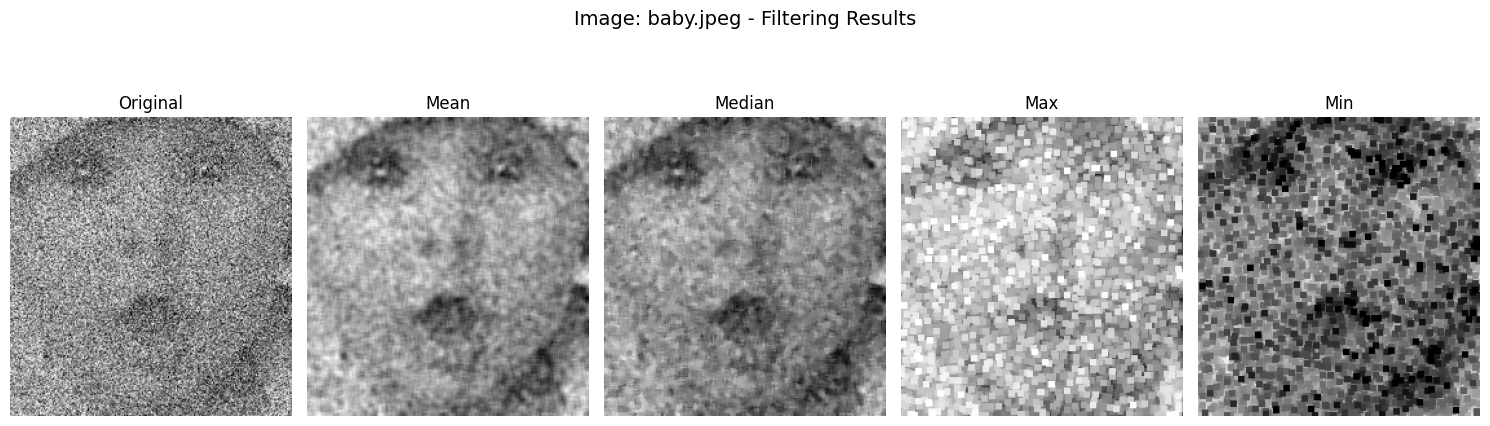

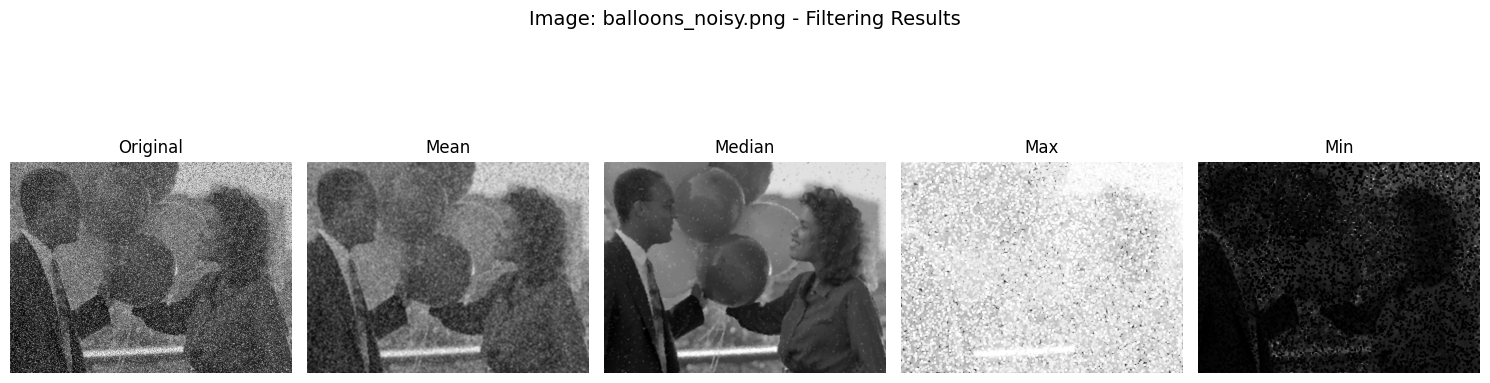

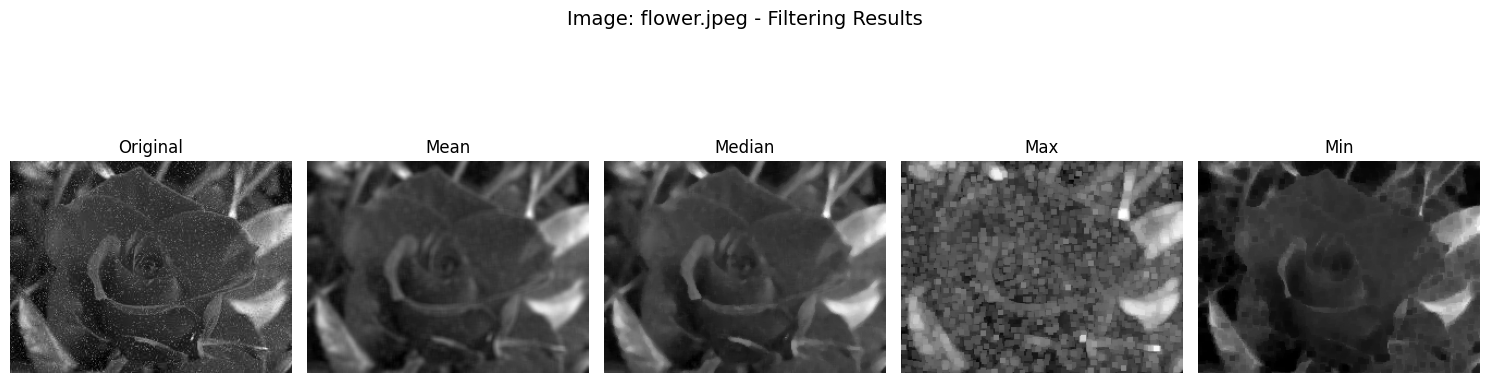

In [ ]:
#bài 6
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Danh sách ảnh đúng như bạn yêu cầu
image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

for idx, filename in enumerate(image_files):
    # Đọc ảnh RGB và chuyển sang ảnh xám
    img_rgb = iio.imread(filename)
    img = rgb2gray(img_rgb)

    # Các bộ lọc
    mean_kernel = np.ones((5, 5)) / 25
    mean_filtered = sn.convolve(img, mean_kernel)
    median_filtered = sn.median_filter(img, size=5)
    max_filtered = sn.maximum_filter(img, size=5)
    min_filtered = sn.minimum_filter(img, size=5)

    # Hiển thị kết quả
    titles = ['Original', 'Mean', 'Median', 'Max', 'Min']
    images = [img, mean_filtered, median_filtered, max_filtered, min_filtered]

    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.suptitle(f'Image: {filename} - Filtering Results', fontsize=14)
    plt.tight_layout()
    plt.show()


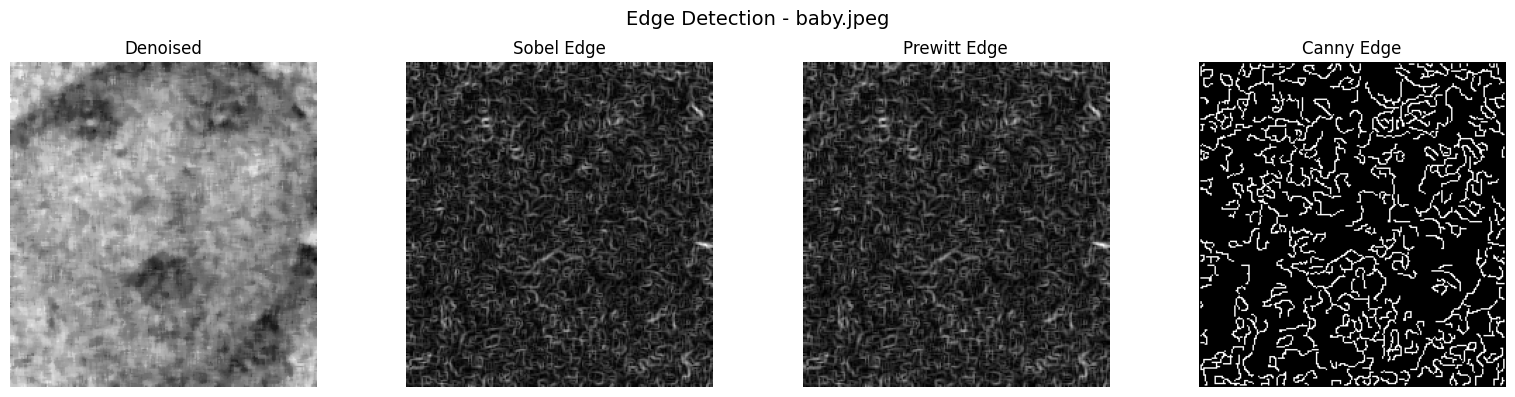

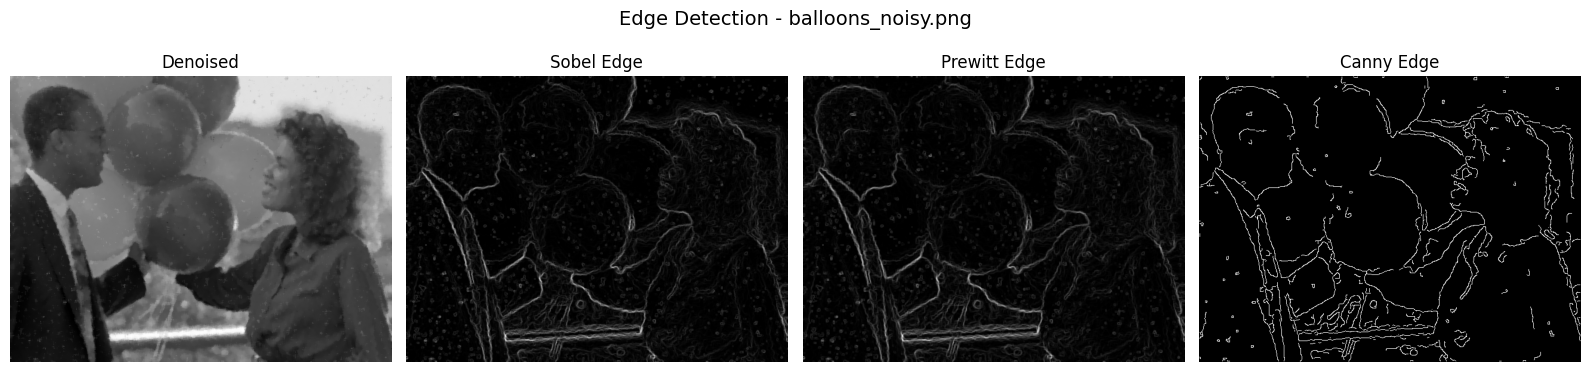

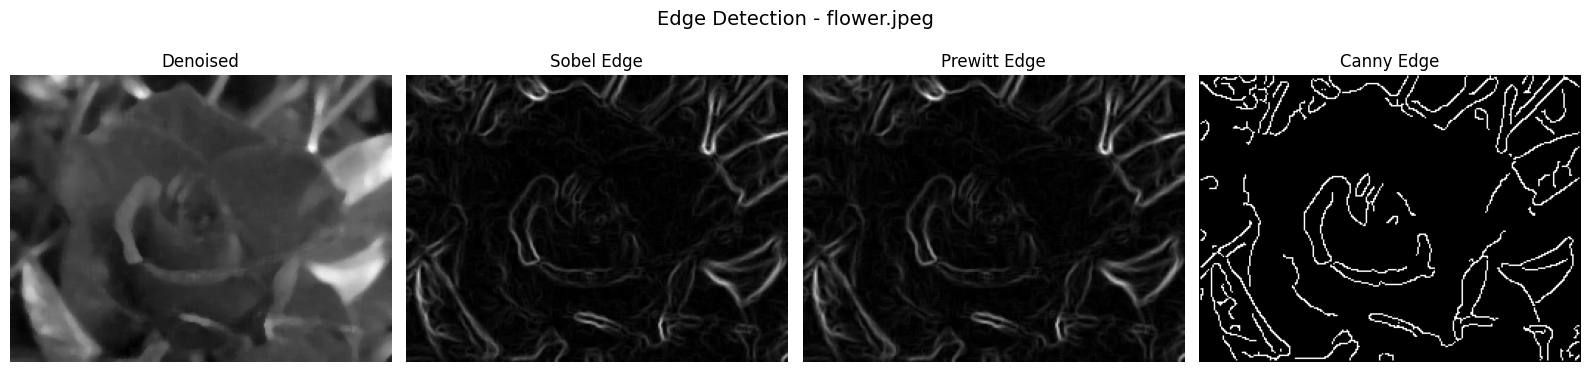

In [ ]:
#Bài 7
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import canny  # thêm import Canny

# Danh sách ảnh
image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

for idx, filename in enumerate(image_files):
    # Đọc ảnh RGB và chuyển thành xám
    img_rgb = iio.imread(filename)
    img_gray = rgb2gray(img_rgb)

    # Khử nhiễu bằng median filter
    denoised = sn.median_filter(img_gray, size=6)  

    # 1. Sobel filter
    sobel_x = sn.sobel(denoised, axis=0)
    sobel_y = sn.sobel(denoised, axis=1)
    sobel_edge = np.hypot(sobel_x, sobel_y)
    sobel_edge /= np.max(sobel_edge)  

    # 2. Prewitt filter
    prewitt_x = sn.prewitt(denoised, axis=0)
    prewitt_y = sn.prewitt(denoised, axis=1)
    prewitt_edge = np.hypot(prewitt_x, prewitt_y)
    prewitt_edge /= np.max(prewitt_edge)  

    # 3. Canny filter
    canny_edge = canny(denoised, sigma=1.0)

    # Lưu ảnh kết quả (nhân 255 và chuyển về uint8)
    iio.imwrite(f"{filename}_denoised.png", (denoised * 255).astype(np.uint8))
    iio.imwrite(f"{filename}_sobel.png", (sobel_edge * 255).astype(np.uint8))
    iio.imwrite(f"{filename}_prewitt.png", (prewitt_edge * 255).astype(np.uint8))
    iio.imwrite(f"{filename}_canny.png", (canny_edge * 255).astype(np.uint8))

    # Hiển thị kết quả
    plt.figure(figsize=(16, 4))
    images = [denoised, sobel_edge, prewitt_edge, canny_edge]
    titles = ['Denoised', 'Sobel Edge', 'Prewitt Edge', 'Canny Edge']

    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.suptitle(f'Edge Detection - {filename}', fontsize=14)
    plt.tight_layout()
    plt.show()


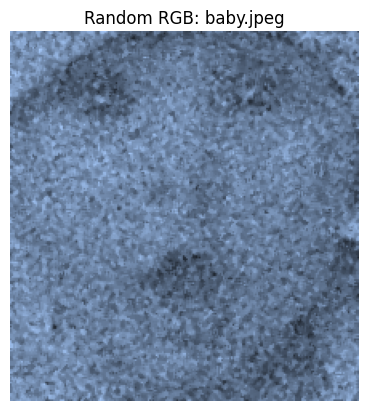

Đã lưu ảnh: baby_processed.png


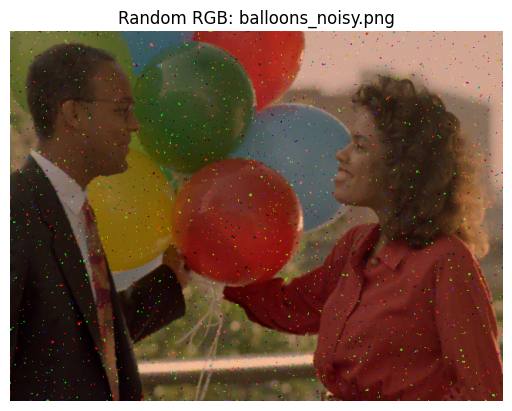

Đã lưu ảnh: balloons_noisy_processed.png


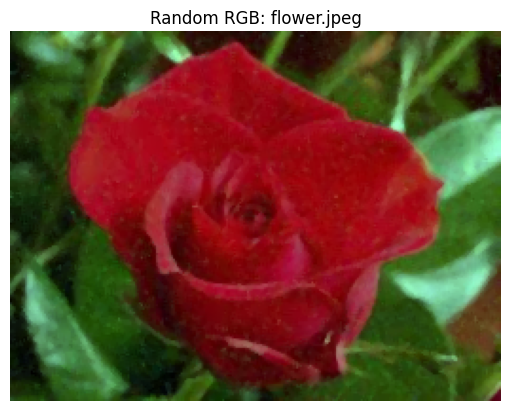

Đã lưu ảnh: flower_processed.png


In [25]:
#bài 8
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import median_filter

# Danh sách ảnh
image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

def random_rgb_transform(img):
    """Đổi màu RGB bằng cách nhân hệ số ngẫu nhiên trên từng kênh"""
    factors = np.random.uniform(0.5, 1.5, size=3)
    transformed = img * factors
    transformed = np.clip(transformed, 0, 1)  # Đảm bảo giá trị trong [0,1] cho matplotlib
    return transformed

for filename in image_files:
    try:
        # Đọc ảnh
        img = mpimg.imread(filename)
        if img.dtype == np.uint8:
            img = img / 255.0  # Chuẩn hóa về 0–1 nếu ảnh ở dạng uint8

        # Khử nhiễu
        denoised = np.zeros_like(img)
        for i in range(3):  # R, G, B
            denoised[..., i] = median_filter(img[..., i], size=3)

        # Đổi màu RGB ngẫu nhiên
        transformed = random_rgb_transform(denoised)

        # Hiển thị ảnh
        plt.imshow(transformed)
        plt.title(f'Random RGB: {filename}')
        plt.axis('off')
        plt.show()

        # Lưu ảnh sau xử lý
        save_name = filename.rsplit('.', 1)[0] + '_processed.png'
        plt.imsave(save_name, transformed)
        print(f"Đã lưu ảnh: {save_name}")

    except Exception as e:
        print(f"Lỗi xử lý {filename}: {e}")


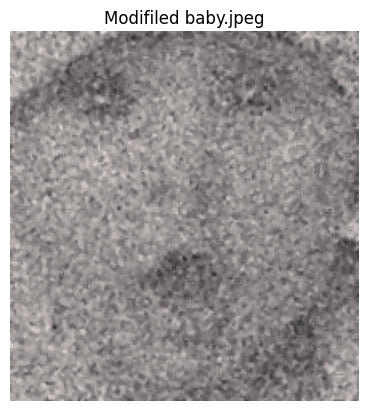

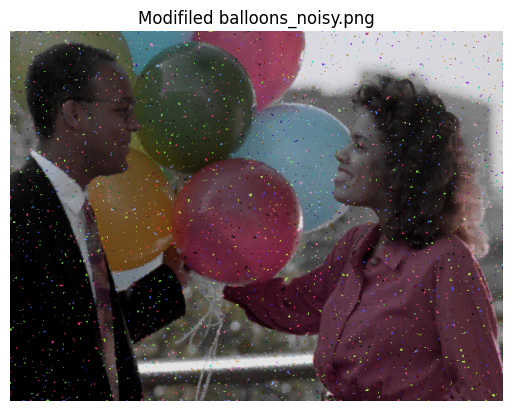

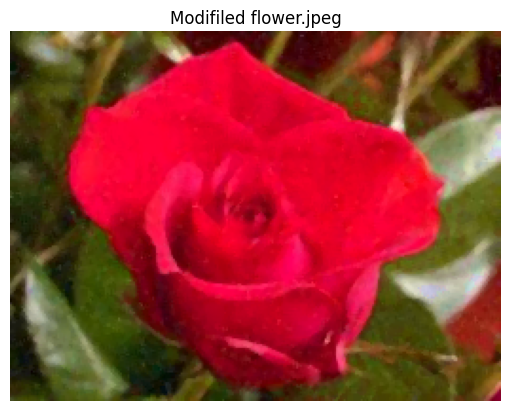

In [ ]:
#bài 9
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import median_filter
import matplotlib.colors as colors
import hashlib
import os

image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

processed_hashes = set()

def median_denoise(img, size=3):
    denoised = np.zeros_like(img)
    for i in range(3):
        denoised[..., i] = median_filter(img[..., i], size=size)
    return denoised

def random_hsv_transform(img_rgb):
    img_hsv = colors.rgb_to_hsv(img_rgb)
    delta_h = np.random.uniform(-0.1, 0.1)
    img_hsv[..., 0] = (img_hsv[..., 0] + delta_h) % 1.0
    delta_s = np.random.uniform(-0.2, 0.2)
    img_hsv[..., 1] = np.clip(img_hsv[..., 1] + delta_s, 0, 1)
    delta_v = np.random.uniform(-0.2, 0.2)
    img_hsv[..., 2] = np.clip(img_hsv[..., 2] + delta_v, 0, 1)
    img_rgb_mod = colors.hsv_to_rgb(img_hsv)
    return img_rgb_mod

def hash_image(img):
    img_uint8 = (img * 255).astype(np.uint8)
    return hashlib.md5(img_uint8.tobytes()).hexdigest()

for filename in image_files:
    try:
        img = mpimg.imread(filename)
        if img.dtype == np.uint8:
            img = img / 255.0
        if img.shape[2] > 3:
            img = img[..., :3]

        img_denoised = median_denoise(img)

        for _ in range(10):
            img_mod = random_hsv_transform(img_denoised)
            h = hash_image(img_mod)
            if h not in processed_hashes:
                processed_hashes.add(h)
                break
        else:
            img_mod = img_denoised

        save_path = filename.rsplit('.', 1)[0] + '_modifiled.png'
        plt.imsave(save_path, img_mod)

        plt.imshow(img_mod)
        plt.title(f'Modifiled {filename}')
        plt.axis('off')
        plt.show()

    except Exception:
        pass
